In [0]:
import cv2
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Conv2D, Dense, MaxPool2D, BatchNormalization, Flatten, Dropout, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [88]:
#Load the training and test data
df = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')
df.shape

(42000, 785)

In [110]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Convert dataframe to input(X_train) and output label(Y_train) format where input is the values of all the 28x28 pixels in all the images and output label is the actual digit the image represents.
Y_train = df['label']
X_train = df.drop(labels=['label'],axis=1)
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [0]:
#Check null values in the labels
Y_train.isnull().values.any()

False

In [0]:
#Check null values in the pixel data
X_train.isnull().values.any()

False

In [0]:
#Normalise the data
X_train = X_train/255
df_test = df_test/255

The CNN Models converge faster on data in (0,1).

In [0]:
#Convert pixel data to 28x28x1 image
X_train_reshape = X_train.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)

 The data of each image is given as 1D array of 784 values. This 1D array is converted to 3D greyscale image using reshape. The reshape function has first param as -1 as the number of rows are unknown. The dimension of each image is 28x28x1. The 1 represents number of channels in greyscale image. For RGB the number of channels is 3.

In [0]:
print(np.shape(X_train_reshape))
print(np.shape(df_test))

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [0]:
#Convert categorical data to one hot encoding using keras
Y_train = to_categorical(Y_train, num_classes=10)

The digits 0-9 repesent categorical data. They are converted to one-hot-encoded vectors. This is done to achieve output in the form of probabilites for each class. The class with maximum probability is given as predicted output.

In [0]:
print(Y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#Create test dataset from the training data
X_train, X_test, Y_train, Y_test = train_test_split(X_train_reshape, Y_train, test_size=0.1, random_state=42)

In [0]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (37800, 28, 28, 1)
X_test shape: (4200, 28, 28, 1)
Y_train shape: (37800, 10)
Y_test shape: (4200, 10)


**CNN Model**



In [0]:
#CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)               

Early stopping is used for the model. It enables us to specifiy more number of epoches for training but it stops training once the model doesn't improve further with a patience of a specified number of epoches.
Model Checkpoints are used to save the model weights after each epoch if the val_loss is decreased.

In [0]:
# callbacks = [ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/digit-recognizer/best.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False),
#              EarlyStopping(patience=3, monitor='val_loss', verbose=1)]
callbacks = [ModelCheckpoint('model/best.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)]

In [0]:
history = model.fit(X_train, Y_train, epochs=30, validation_split=0.1, callbacks=callbacks)

Train on 34020 samples, validate on 3780 samples
Epoch 1/30
34020/34020 [==============================] - 6s 169us/step - loss: 0.0118 - acc: 0.9961 - val_loss: 0.0629 - val_acc: 0.9854

Epoch 00001: val_loss improved from inf to 0.06292, saving model to /content/drive/My Drive/Colab Notebooks/digit-recognizer/best.h5
Epoch 2/30
34020/34020 [==============================] - 6s 170us/step - loss: 0.0097 - acc: 0.9971 - val_loss: 0.0632 - val_acc: 0.9862

Epoch 00002: val_loss did not improve from 0.06292
Epoch 3/30
34020/34020 [==============================] - 6s 171us/step - loss: 0.0082 - acc: 0.9972 - val_loss: 0.0628 - val_acc: 0.9868

Epoch 00003: val_loss improved from 0.06292 to 0.06277, saving model to /content/drive/My Drive/Colab Notebooks/digit-recognizer/best.h5
Epoch 4/30
34020/34020 [==============================] - 6s 168us/step - loss: 0.0082 - acc: 0.9971 - val_loss: 0.0627 - val_acc: 0.9868

Epoch 00004: val_loss improved from 0.06277 to 0.06274, saving model to /c

In [0]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.991


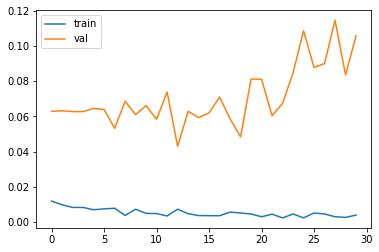

In [0]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [0]:
# predict results
results = model.predict(df_test)
# select the index with maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submit = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submit.to_csv("submission/mnist_predictions.csv",index=False)

<img src="submission/mnist_submission.png" />

**Data Augmentation**
<br>In order to avoid overfitting that is happening after around 15 epoches, I used data augmentation techniques such as translation along X and Y axis, rotation, resizing etc to increase the amount of data. It will help the model to generalise well.
<br>I had to use generators to feed the data to the keras model as large amount of data cannot be loaded in memory at a time. So data will be processed in batches fed by the generator.

In [89]:
#Split the training data to 3 parts- training data, validation data(0.1) and test data(0.1)
#Copy the data to 3 different files- training_data.csv, validation_data.csv, testing_data.csv
from itertools import islice
def copy_data(inputPath, destPath, start, end):  
  # open data file in read mode 
  fn = open(inputPath, 'r') 
    
  # open other file in write mode 
  fn1 = open(destPath, 'w') 
    
  # read the content of the file line by line 
  cont = fn.readlines() 
  type(cont) 
  for i in range(0, len(cont)): 
      if(i>=start and i<=end): 
          fn1.write(cont[i]) 
      else: 
          pass
    
  # close all files 
  fn.close() 
  fn1.close()

# train_end = df.shape[0]*0.8
# val_end = train_end + df.shape[0]*0.1
# test_end = val_end + df.shape[0]*0.1

# print('train_end: ', train_end)
# print('val_end: ', val_end)
# print('test_end: ', test_end)

train_end = df.shape[0]*0.9
val_end = train_end + df.shape[0]*0.1

print('train_end: ', train_end)
print('val_end: ', val_end)

train_end:  37800.0
val_end:  42000.0


In [0]:
train_csv = 'dataset/train.csv'
training_data_path = 'dataset/training_data.csv'
validation_data_path = 'dataset/validation_data.csv'
testing_data_path = 'dataset/testing_data.csv'

In [0]:
copy_data(train_csv,training_data_path, 1, train_end)
copy_data(train_csv,validation_data_path, train_end+1, val_end)
# copy_data(train_csv,testing_data_path, val_end+1, test_end)

Pick up some all from training data and apply the following:
<br>1. Rotating image by an angle between (0-30)deg randomly and zoom by 10%
<br>2. Shift the image horizontally by 10% of the width 
<br>3. Shift the image vertically by 10% of the height

In [0]:
#Data augmentation using opencv
import cv2
def rotate_image(image, angle, scale):
  # plt.subplot(1, 2, 1)
  # plt.imshow(image, cmap='Greys', interpolation=None)
  # plt.title('Augmentation')
  # plt.ylabel('Original')
  
  w = image.shape[1]
  h = image.shape[0]
  #rotate matrix
  M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
  #rotate
  image = cv2.warpAffine(image,M,(w,h))

  # plt.subplot(1, 2, 2)
  # plt.imshow(image, cmap='Greys', interpolation=None)
  # plt.ylabel('Rotated')
  # plt.show()
  image = (image.reshape(28,28,1))/255.0

  return image

def translate_in_X(image, tx):
  # plt.subplot(1, 2, 1)
  # plt.imshow(image, cmap='Greys', interpolation=None)
  # plt.title('Augmentation')
  # plt.ylabel('Original')
  rows,cols = image.shape
  M = np.float32([[1,0,tx],[0,1,0]])
  # print("m: ", M)
  image = cv2.warpAffine(image,M,(cols,rows))

  # plt.subplot(1, 2, 2)
  # plt.imshow(image, cmap='Greys', interpolation=None)
  # plt.ylabel('Rotated')
  # plt.show()
  image = (image.reshape(28,28,1))/255.0
  return image

def translate_in_Y(image, ty):
  rows,cols = image.shape
  M = np.float32([[1,0,0],[0,1,ty]])
  image = cv2.warpAffine(image,M,(cols,rows))
  image = (image.reshape(28,28,1))/255.0
  return image

In [48]:
f = open(training_data_path, "r")
line = f.readline()
line = line.strip().split(",")
image = np.asfarray(line[1:]).reshape(28,28)
image = translate_in_X(image,1)
image = image.reshape(28,28,1)
print(image.shape)

(28, 28, 1)


In [0]:
import random
def augment_data(image):
  images = []
  angle = random.uniform(0,30)
  scale = random.uniform(1,2)
  tx = random.uniform(0,3)
  ty = random.uniform(0,3)
  images.append(rotate_image(image, random.uniform(0,30), random.uniform(1,2)))
  images.append(rotate_image(image, random.uniform(0,30), random.uniform(1,2)))
  images.append(rotate_image(image, random.uniform(0,30), random.uniform(1,2)))
  images.append(translate_in_X(image, tx))
  images.append(translate_in_Y(image, ty))
  return images

In [0]:
#Image generator
def csv_to_image_generator(dataPath, batch_size, mode):

  #Open the csv file in read mode
  f = open(dataPath, "r")
  while True:
    images = []
    labels = []

    while len(images) < batch_size:
      line = f.readline()
      
      if line == "":
        f.seek(0)
        line = f.readline()

      line = line.strip().split(",")
      tmp = [0 for i in range(10)]
      tmp[int(line[0])] = 1

      image = (np.asfarray(line[1:]).reshape(28,28))
      if mode=='train':
        images += augment_data(image)
        for i in range(0,5): 
          labels.append(tmp)

      image = (image.reshape(28,28,1)) / 255.0
      
      #print("shape:",np.shape(image))
      #print("shape of tmp:", np.shape(tmp))
      images.append(image)
      labels.append(tmp)

    #print("shape of images:", np.shape(images))
    #print("shape of labels:", np.shape(labels)) 
    yield(np.array(images), np.array(labels))

In [0]:
#Testing image generator
def csv_to_image_test_generator(dataPath, batch_size, mode):

  #Open the csv file in read mode
  f = open(dataPath, "r")
  _ = f.readline()
  while True:
    images = []

    while len(images) < batch_size:
      line = f.readline()
      
      if line == "":
        f.seek(0)
        _ = f.readline()
        line = f.readline()

      line = line.strip().split(",")
      image = (np.asfarray(line).reshape(28,28,1))/255.0
      
      #print("shape:",np.shape(image))
      #print("shape of tmp:", np.shape(tmp))
      images.append(image)

    #print("shape of images:", np.shape(images))
    #print("shape of labels:", np.shape(labels)) 
    yield(np.array(images))

In [0]:
train_data = 'dataset/training_data.csv'
val_data = 'dataset/validation_data.csv'
# test_data = '/content/drive/My Drive/Colab Notebooks/digit-recognizer/testing_data.csv'
batch_size = 32
train_gen = csv_to_image_generator(train_data, batch_size, 'train')
val_gen = csv_to_image_generator(val_data, batch_size, None)


In [0]:
from keras.layers import BatchNormalization

In [0]:
#Model-2
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='same'))
model2.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization(axis=-1))
#model.add(Dropout(0.5))

model2.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model2.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization(axis=-1))
#model.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

In [98]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 128)        

In [0]:
callbacks = [ModelCheckpoint('model/best_with_gen.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)]

In [100]:
history = model2.fit_generator(train_gen, steps_per_epoch=train_end//batch_size, validation_data=val_gen, validation_steps= (val_end-train_end)// batch_size, epochs=50, callbacks=callbacks)

Epoch 1/50
1181/1181 [==============================] - 16s 13ms/step - loss: 0.3020 - acc: 0.9140 - val_loss: 0.2365 - val_acc: 0.9506

Epoch 00001: val_loss improved from inf to 0.23646, saving model to /content/drive/My Drive/Colab Notebooks/digit-recognizer/best_with_gen.h5
Epoch 2/50
1181/1181 [==============================] - 14s 12ms/step - loss: 0.1486 - acc: 0.9574 - val_loss: 0.1048 - val_acc: 0.9678

Epoch 00002: val_loss improved from 0.23646 to 0.10483, saving model to /content/drive/My Drive/Colab Notebooks/digit-recognizer/best_with_gen.h5
Epoch 3/50
1181/1181 [==============================] - 14s 12ms/step - loss: 0.1041 - acc: 0.9699 - val_loss: 0.0968 - val_acc: 0.9714

Epoch 00003: val_loss improved from 0.10483 to 0.09679, saving model to /content/drive/My Drive/Colab Notebooks/digit-recognizer/best_with_gen.h5
Epoch 4/50
1181/1181 [==============================] - 14s 12ms/step - loss: 0.0961 - acc: 0.9721 - val_loss: 0.0536 - val_acc: 0.9862

Epoch 00004: val_l

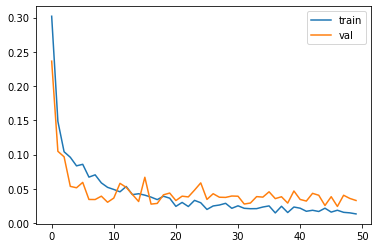

In [102]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [0]:
# predict results
testing_data = '../dataset/test.csv'
test_gen = csv_to_image_test_generator(testing_data, batch_size, None)
results = model2.predict_generator(test_gen, steps=df_test.shape[0]//batch_size)
# select the index with maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submit = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submit.to_csv("submission/mnist_predictions_using_gen.csv",index=False)

<img src='submission/mnist_submission_2.png' />